<a href="https://colab.research.google.com/github/PatTheAtak/Team-one-capstone-/blob/master/Monthly_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description
1. District: The lower level geographical area within CÃ´te dâ€™Ivoire
2. Month: The month of the observation
3. Implant-women-old: Number of women receiving implants during the month, who used contraception previously
4. Implant-women-new: Number of women receiving implants during the month, who did not use contraception previously
5. Injection2-women-old:Number of women receiving injection (2 months) during the month, who used contraception previously
6. Injection2-women-new: Number of women receiving injection (2 months) during the month, who did not use contraception previously
7. Injection3-women-new: Number of women receiving injection (3 months) during the month, who used contraception previously
8. Injection3-women-old: Number of women receiving injection (3 months) during the month, who did not use contraception previously
9. Pill-women-old: Number of women receiving oral contraceptives during the month, who used contraception previously
10. Pill-women-new: Number of women receiving oral contraceptives during the month, who did not use contraception previously
11. iud-women-old: Number of women receiving IUDs during the month, who used contraception previously
12. iud-women-new: Number of women receiving IUDs during the month, who did not use contraception previously
13. iud-number-dispensed: Number of IUDs given to women during that month
14. implant-number-dispensed: Number of implants given to women during that month
15. injection2-number-dispensed: Number of injection (2 months) given to women during that month
16. injection3-number-dispensed: Number of injection (3 months) given to women during that month
17. Pill-number-dispensed: Number of oral contraceptives (one cycle) given to women during that month
18. iud-number-received:Number of IUD received in that month
19. implant-number-received:Number of implants received in that month
20. injection2-number-received: Number of injection (2 months) received in that month
21. injection3-number-received: Number of injection (3 months) received in that month
22. pill-number-received: Number of oral contraceptive (one cycle) received in that month
23. iud-stock-end: The amount of IUD stock available at the end of that month
24. implant-stock-end: The amount of implant stock available at the end of that month
25. injection2-stock-end: The amount of injection (2 months) stock available at the end of that month
26. injection3-stock-end: The amount of injection (3 months) stock available at the end of that month
27. pill-stock-end: The amount of pill stock available at the end of that month


**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # This is the changes I made.
%matplotlib inline


**Loading the dataset**

In [ ]:
df_monthly = pd.read_csv("/content/monthly_cases.csv")

**Checking the data**

In [ ]:
# Checking the shape of the data
df_monthly.shape

(678, 28)

In [ ]:
# Checking the datatypes
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   district                     678 non-null    object 
 1   month                        678 non-null    int64  
 2   year                         678 non-null    int64  
 3   implant_women_old            610 non-null    float64
 4   implant_women_new            672 non-null    float64
 5   injection2_women_old         556 non-null    float64
 6   injection2_women_new         481 non-null    float64
 7   injection3_women_old         678 non-null    int64  
 8   injection3_women_new         678 non-null    int64  
 9   pill_women_old               621 non-null    float64
 10  pill_women_new               595 non-null    float64
 11  iud_women_old                250 non-null    float64
 12  iud_women_new                306 non-null    float64
 13  iud_number_dispensed



*   The monthly dataset has 28 columns and 678 rows
*   Except for the district column, all the other columns are categorical and numerical



**Cleaning the data**

**1. Dealing with missing data**

In [ ]:
# Checking for missing data
df_monthly.isna().sum()

district                         0
month                            0
year                             0
implant_women_old               68
implant_women_new                6
injection2_women_old           122
injection2_women_new           197
injection3_women_old             0
injection3_women_new             0
pill_women_old                  57
pill_women_new                  83
iud_women_old                  428
iud_women_new                  372
iud_number_dispensed           429
implant_number_dispensed        29
injection2_number_dispensed    170
injection3_number_dispensed     16
pill_number_dispensed           63
iud_number_received            344
implant_number_received         35
injection2_number_received     182
injection3_number_received      21
pill_number_received            63
iud_stock_end                  678
implant_stock_end               33
injection2_stock_end           678
injection3_stock_end            19
pill_stock_end                  52
dtype: int64

In [ ]:
df_monthly.fillna(0)

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,34.0,0.0,0.0,0.0,75.0,44.0,1082.0,2542.0,0.0,319.0,33.0,1244.0,2846.0,0.0,422.0,0.0,1501.0,3466.0
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,19.0,9.0,1.0,1.0,66.0,38.0,813.0,557.0,20.0,255.0,17.0,1174.0,2608.0,0.0,394.0,0.0,1535.0,3327.0
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,26.0,0.0,5.0,5.0,47.0,42.0,819.0,665.0,50.0,214.0,50.0,1050.0,2148.0,0.0,340.0,0.0,1187.0,3636.0
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,35.0,0.0,3.0,1.0,36.0,66.0,874.0,404.0,45.0,217.0,55.0,824.0,1787.0,0.0,340.0,0.0,889.0,2727.0
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,24.0,0.0,1.0,1.0,71.0,47.0,813.0,545.0,14.0,321.0,256.0,1032.0,1635.0,0.0,355.0,0.0,604.0,1668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,ZUENOULA,2,2019,43.0,87.0,11.0,2.0,383,152,42.0,42.0,0.0,4.0,0.0,89.0,0.0,383.0,110.0,3.0,176.0,4.0,449.0,509.0,0.0,154.0,0.0,133.0,485.0
674,ZUENOULA,3,2019,125.0,224.0,5.0,4.0,426,255,58.0,144.0,0.0,0.0,0.0,180.0,4.0,332.0,67.0,3.0,223.0,2.0,553.0,523.0,0.0,159.0,0.0,340.0,197.0
675,ZUENOULA,4,2019,62.0,106.0,9.0,0.0,341,127,145.0,11.0,2.0,2.0,2.0,119.0,3.0,343.0,57.0,3.0,261.0,17.0,340.0,520.0,0.0,206.0,0.0,257.0,571.0
676,ZUENOULA,5,2019,25.0,111.0,14.0,2.0,364,116,92.0,18.0,0.0,1.0,0.0,125.0,12.0,399.0,333.0,1.0,154.0,18.0,468.0,741.0,0.0,201.0,0.0,324.0,505.0


In [ ]:
# Dropping columns with null values
# Year, injection2-stock-end, iud-stock-end
df_monthly.drop(["year","iud_stock_end", "injection2_stock_end"], axis=1, inplace=True)

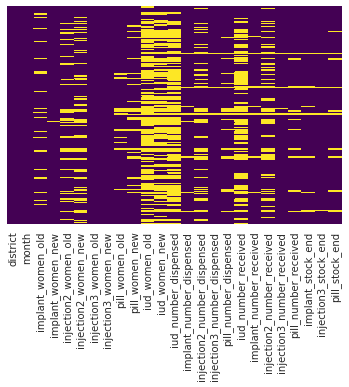

In [ ]:
# Visualising the missing columns 
sns.heatmap(df_monthly.isnull(),yticklabels=False,cmap='viridis',cbar=False)

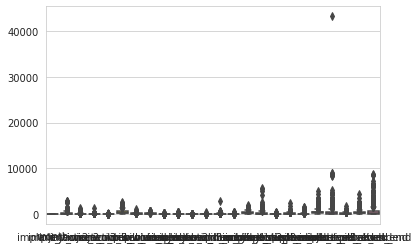

In [ ]:
# Dealing with outliers
sns.boxplot(data=df_monthly)
# We will not remove outliers at this stage

**Exploratory data analysis (EDA)**

In [ ]:
# Measures of central tendancy
df_monthly.describe()

,month,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,implant_stock_end,injection3_stock_end,pill_stock_end
count,678.000000,610.000000,672.000000,556.000000,481.000000,678.000000,678.000000,621.000000,595.000000,250.000000,306.000000,249.000000,649.000000,508.000000,662.000000,615.000000,334.000000,643.000000,496.000000,657.000000,615.000000,645.000000,659.000000,626.000000
mean,3.500000,213.509836,77.831845,39.429856,9.428274,495.436578,110.523599,98.466989,17.986555,29.924000,7.071895,14.269076,73.805855,29.826772,354.691843,278.626016,30.311377,138.527216,102.322581,505.001522,665.076423,143.289922,390.250379,694.589457
std,1.709086,358.961649,108.731927,71.846085,12.449881,467.385785,94.042050,126.187320,26.655676,72.441128,9.717387,31.723031,138.604484,51.024934,323.045598,536.933451,46.266678,191.089246,193.269208,579.414216,2107.103258,177.133941,461.823990,1266.391772
min,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,12.000000,21.000000,6.000000,2.000000,184.500000,51.000000,15.000000,5.000000,2.000000,2.000000,2.000000,18.000000,5.000000,132.250000,28.000000,5.000000,35.500000,15.000000,183.000000,61.000000,38.000000,124.000000,65.250000
50%,3.500000,75.000000,45.000000,18.000000,5.000000,320.000000,87.000000,45.000000,10.000000,8.000000,4.000000,5.000000,43.000000,14.000000,260.000000,94.000000,10.500000,82.000000,45.000000,335.000000,176.000000,91.000000,239.000000,247.500000
75%,5.000000,288.500000,87.000000,50.000000,12.000000,665.750000,136.750000,130.000000,21.000000,22.500000,9.000000,16.000000,88.000000,34.250000,449.250000,300.500000,35.500000,161.000000,107.250000,538.000000,518.500000,174.000000,460.500000,658.000000
max,6.000000,2883.000000,1344.000000,1259.000000,133.000000,2534.000000,1061.000000,726.000000,314.000000,498.000000,99.000000,410.000000,2889.000000,487.000000,1903.000000,5711.000000,364.000000,2333.000000,1621.000000,4934.000000,43282.000000,1801.000000,4274.000000,8775.000000


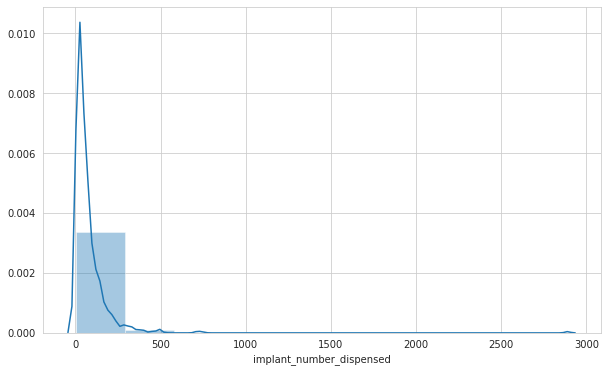

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(df_monthly['implant_number_dispensed'],bins=10)

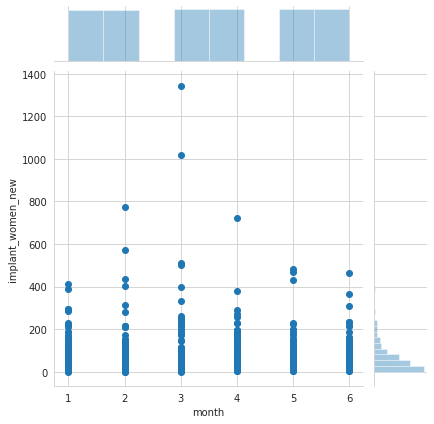

In [ ]:
sns.jointplot(x='month',y='implant_women_new',data=df_monthly)

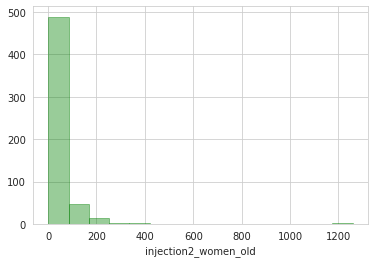

In [ ]:
sns.distplot(df_monthly['injection2_women_old'],bins=15,kde=False,color="green",hist_kws={'edgecolor':'green'})

In [ ]:
# Correlation
corr= df_monthly.corr()
corr

,month,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,implant_stock_end,injection3_stock_end,pill_stock_end
month,1.000000,0.004000,-0.038479,0.073948,0.172848,-0.007471,-0.056387,-0.017515,0.010000,-0.037970,-0.027495,-0.054905,0.025725,0.249769,-0.028254,-0.001895,0.013218,-0.009130,0.204192,-0.006035,0.019665,-0.065879,-0.030699,-0.038522
implant_women_old,0.004000,1.000000,0.238949,0.149491,0.008854,0.623803,0.212318,0.407404,0.100428,0.650834,0.034606,0.058991,0.068673,-0.051615,0.046396,0.164395,-0.027360,0.094819,-0.018513,0.019240,0.173032,0.058558,0.025010,0.223010
implant_women_new,-0.038479,0.238949,1.000000,0.041509,0.187854,0.384144,0.628150,0.315662,0.377034,0.145582,0.569540,0.097814,0.490245,0.128343,0.516118,0.244472,0.134163,0.460002,0.118491,0.337164,0.082854,0.419520,0.345946,0.192836
injection2_women_old,0.073948,0.149491,0.041509,1.000000,0.367850,0.313410,0.098263,0.240143,0.096739,0.017811,0.039884,0.038979,0.056045,0.631841,0.165872,0.078709,0.083717,0.054632,0.390861,0.114112,0.079840,0.057808,0.131269,0.126750
injection2_women_new,0.172848,0.008854,0.187854,0.367850,1.000000,0.266020,0.269238,0.256277,0.244636,0.006747,0.304682,0.049186,0.184377,0.711989,0.371582,0.180108,0.096146,0.183424,0.341005,0.258952,0.085752,0.109401,0.245914,0.167840
injection3_women_old,-0.007471,0.623803,0.384144,0.313410,0.266020,1.000000,0.493093,0.685977,0.292557,0.262416,0.268096,0.153900,0.261916,0.268925,0.512307,0.375476,0.240245,0.375229,0.273010,0.437882,0.331503,0.395087,0.421913,0.556431
injection3_women_new,-0.056387,0.212318,0.628150,0.098263,0.269238,0.493093,1.000000,0.341788,0.571910,0.130756,0.330921,0.080087,0.423171,0.256693,0.749673,0.309859,0.184748,0.514456,0.187623,0.552765,0.110550,0.464396,0.448400,0.198138
pill_women_old,-0.017515,0.407404,0.315662,0.240143,0.256277,0.685977,0.341788,1.000000,0.363452,0.299501,0.188377,0.235962,0.235581,0.291414,0.509875,0.523223,0.424854,0.395712,0.366849,0.483644,0.328752,0.417560,0.480614,0.545735
pill_women_new,0.010000,0.100428,0.377034,0.096739,0.244636,0.292557,0.571910,0.363452,1.000000,0.055968,0.195636,0.050642,0.253387,0.273335,0.516011,0.279248,0.149796,0.355129,0.171062,0.418323,0.068343,0.298121,0.323420,0.114351
iud_women_old,-0.037970,0.650834,0.145582,0.017811,0.006747,0.262416,0.130756,0.299501,0.055968,1.000000,0.013648,0.229541,-0.000723,-0.019284,-0.026814,0.009561,-0.032437,-0.006778,0.008508,-0.025984,-0.000213,-0.072949,-0.036070,-0.028815


<BarContainer object of 678 artists>

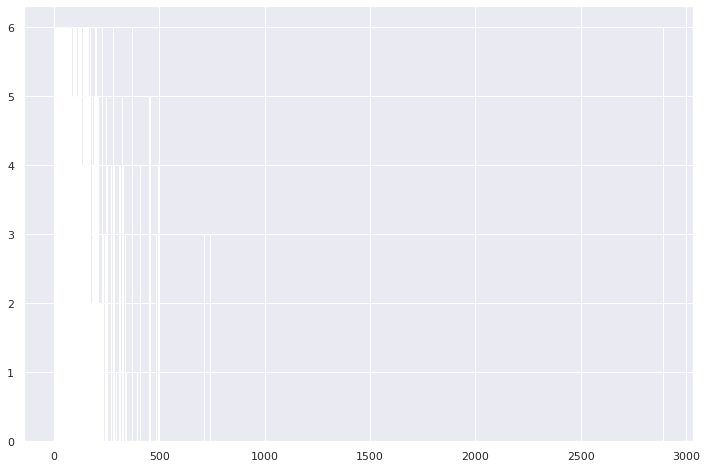

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x=df_monthly["implant_number_dispensed"], height=df_monthly["month"], color="midnightblue")